# Avaliação do K-Nearest Neighbors para as seleções propostas

In [5]:
# Manipulação dos dados
import numpy  as np
import scipy  as sp
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

In [35]:
# Importando o classificador
from sklearn.neighbors import KNeighborsClassifier as KNN

In [7]:
# Conjunto de treinamento e teste - normal
training_data = pd.read_csv('../../Dados/treinamento-one-hot.csv')
test_data     = pd.read_csv('../../Dados/teste-one-hot.csv')

In [9]:
# Conjunto de treinamento e teste - full
training_data_full = pd.read_csv('../../Dados/treinamento-one-hot_full.csv')
test_data_full     = pd.read_csv('../../Dados/teste-one-hot_full.csv')

### Carregando o dataset do chi quadrado para obter a lista de features

In [15]:
normal = pd.read_csv('../../Dados/one-hot-chi2.csv')
full   = pd.read_csv('../../Dados/one-hot-full-chi2.csv')

### 1. Resultados para a seleção utilizando qui-quadrado

In [16]:
normal.columns

Index(['Cicatriz_BCG', 'Prisão_2anos', 'Estado_civil_viúvo', 'Dispnéia',
       'Semanas_tosse', 'Febre', 'Perda_peso_10percent', 'Delegacia_2anos',
       'Sexo', 'Estado_civil_Casado', 'Expectoração', 'Sudorese_noturna',
       'Estado_civil_Solteiro', 'desfecho'],
      dtype='object')

In [17]:
full.columns
full.drop(['desfecho.1', 'desfecho.2','Idade.2','Idade.1',
       'Idade.3', 'Idade.4', 'Idade.5', 'desfecho.3', 'desfecho.4',
       'desfecho.5', 'Idade.6', 'Idade.7', 'Idade.8', 'desfecho.6',
       'desfecho.7', 'desfecho.8'],axis=1,inplace=True)

In [20]:
#
features_normal = list(normal.columns)
features_full   = list(full.columns)

In [40]:
# One-hot encoding parcial
training_data_chi2 = training_data[features_normal].copy()
test_data_chi2     = test_data[features_normal].copy()

In [43]:
# One-hot encoding full
training_data_full_chi2 = training_data_full[features_full].copy()
test_data_full_chi2     = test_data_full[features_full].copy()

In [50]:
# Pré-processamento dos dados
training_data_chi2.replace(['Sim','Não','ignorado','Branco','Não branco','Masculino', 'Feminino','TB+','TB-'],[+1,-1,0,1,0,1,0,1,0],inplace=True)
test_data_chi2.replace(['Sim','Não','ignorado','Branco','Não branco','Masculino', 'Feminino','TB+','TB-'],[+1,-1,0,1,0,1,0,1,0],inplace=True)

In [51]:
training_data_full_chi2.replace(['Sim','Não','ignorado','Branco','Não branco','Masculino', 'Feminino','TB+','TB-'],[+1,-1,0,1,0,1,0,1,0],inplace=True)
test_data_full_chi2.replace(['Sim','Não','ignorado','Branco','Não branco','Masculino', 'Feminino','TB+','TB-'],[+1,-1,0,1,0,1,0,1,0],inplace=True)

# Caso das features normais, desbalanceado

In [52]:
# Pré-processamento
X_train = training_data_chi2[training_data_chi2.columns[:-1]]
y_train = training_data_chi2[training_data_chi2.columns[-1]].values

In [53]:
# Pré-processamento
X_test = test_data_chi2[test_data_chi2.columns[:-1]]
y_test = test_data_chi2[test_data_chi2.columns[-1]].values

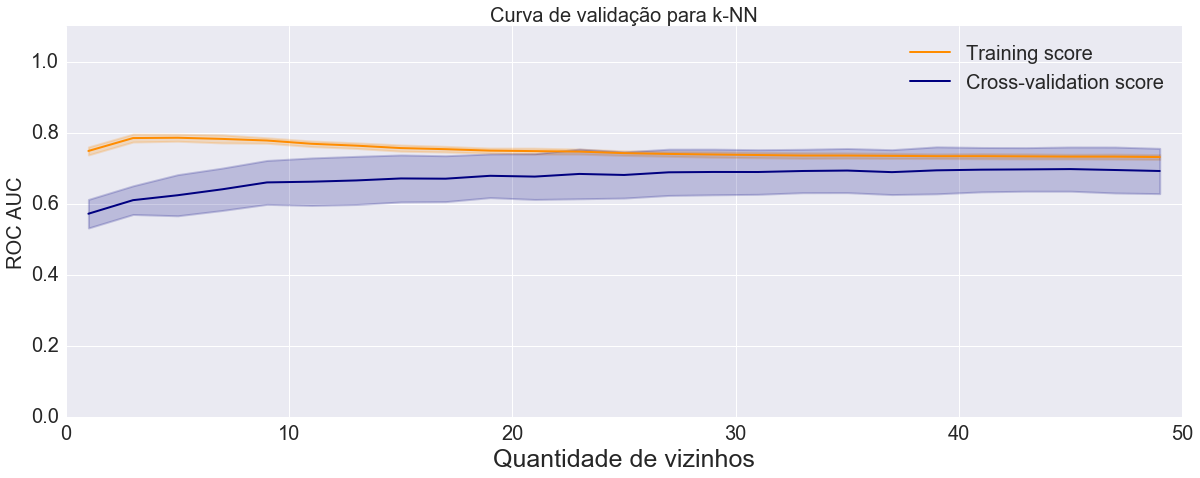

In [87]:
# Curva de validação
from sklearn.model_selection import validation_curve

param_range = list(range(1,51,2))
train_scores, test_scores = validation_curve(
    KNN(), X_train, y_train, param_name='n_neighbors', param_range=param_range,
    cv=10, scoring="roc_auc", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

plt.figure(figsize=(20,7))
plt.title("Curva de validação para k-NN",fontsize=20)
plt.xlabel("Quantidade de vizinhos",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("ROC AUC",fontsize=20)
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best",fontsize=20)
plt.show()

In [61]:
# ANOVA
from scipy.stats import f_oneway

In [62]:
k_21 = test_scores[10]
k_31 = test_scores[15]
k_41 = test_scores[20]

In [86]:
# Verificação para k=19 em diante...
f_oneway(test_scores[0],test_scores[1],test_scores[2],test_scores[3],test_scores[4],test_scores[5],test_scores[6],
        test_scores[7],test_scores[8],test_scores[9],test_scores[10])

F_onewayResult(statistic=2.8357986440061498, pvalue=0.0038590657207373483)

In [90]:
k = test_scores[:19]

In [91]:
f_oneway(*k)

F_onewayResult(statistic=2.4715022437695144, pvalue=0.0013668341455734304)

# Caso das features expandidas, desbalanceado

In [96]:
# Pré-processamento
X_train_full = training_data_full_chi2[training_data_full_chi2.columns[:-1]]
y_train_full = training_data_full_chi2[training_data_full_chi2.columns[-1]].values

In [97]:
# Pré-processamento
X_test_full = test_data_full_chi2[test_data_full_chi2.columns[:-1]]
y_test_full = test_data_full_chi2[test_data_full_chi2.columns[-1]].values

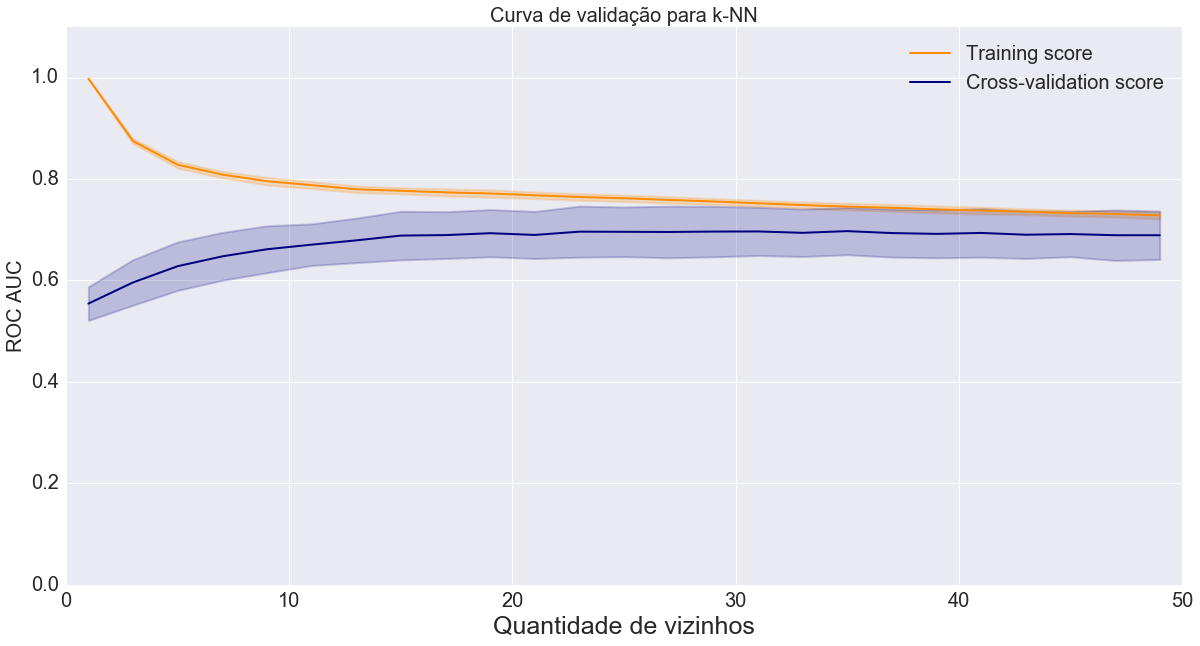

In [98]:
# Curva de validação
from sklearn.model_selection import validation_curve

param_range = list(range(1,51,2))
train_scores, test_scores = validation_curve(
    KNN(), X_train_full, y_train_full, param_name='n_neighbors', param_range=param_range,
    cv=10, scoring="roc_auc", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

plt.figure(figsize=(20,10))
plt.title("Curva de validação para k-NN",fontsize=20)
plt.xlabel("Quantidade de vizinhos",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("ROC AUC",fontsize=20)
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best",fontsize=20)
plt.show()